In [166]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [167]:
result = pd.read_csv('cmake-build-debug/teylor_output.csv', header=None).T

In [168]:
result.head()

,0,1,2,3
0,0.000000,1.000000,0.000000,-1.000000
1,0.000391,1.000000,-0.000391,-0.999610
2,0.000781,1.000000,-0.000781,-0.999219
3,0.001172,1.000000,-0.001171,-0.998829
4,0.001563,0.999999,-0.001561,-0.998439


In [135]:
def f(args):
    return -args[1] + args[0]*np.exp(-args[0])

partials = [
    lambda args: -args[0]*np.exp(-args[0]) + np.exp(-args[0]),
    lambda args: -1,
    lambda args: 0
]

y0 = [1, 0]


def sol(x):
    return 0.5*np.cos(x) + 0.5*x*np.exp(-x) + 0.5*np.exp(-x)

def dsol(x):
    return np.cos(x) + np.sin(x) - np.exp(-x) - x*np.exp(-x)

def d2sol(x):
    return -sol(x) + x*np.exp(-x)

In [136]:
def neuton_rafson(f, grid, y0, partials):
    result = np.zeros(shape=(len(partials), len(grid)))
    for i in range(len(y0)):
        result[i][0] = y0[i]
    result[-1][0] = f([grid[0]] + list(y0))
    
    for i in range(1, len(grid)):
        step = grid[i] - grid[i-1]
        
        for j in range(result.shape[0] - 1):
            result[j][i] = result[j][i-1] + step*result[j+1][i-1]
        
        result[-1][i] = f([grid[i]] + [result[j][i] for j in range(result.shape[0] - 1)])
    
    return [grid] + list(result)
    

In [137]:
presult = neuton_rafson(f, np.arange(0, 2, 0.0005), y0, partials)

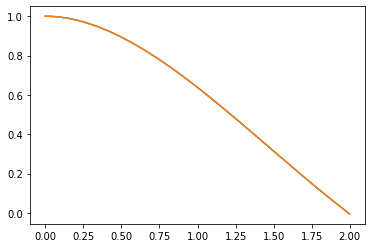

In [138]:
plt.plot(presult[0], presult[1])
plt.plot(presult[0], list(map(sol, presult[0])))

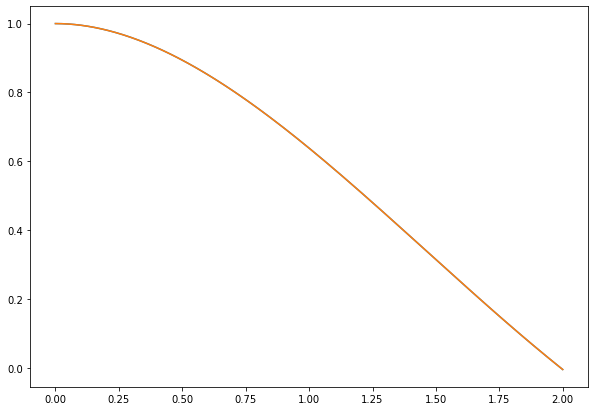

In [169]:
plt.figure(figsize=(10, 7))
plt.plot(result[0], result[1])
plt.plot(result[0], result[0].apply(sol))

In [170]:
result.size

20484

In [165]:
max(np.abs(result[1] - result[0].apply(sol)))

0.012631957399919513

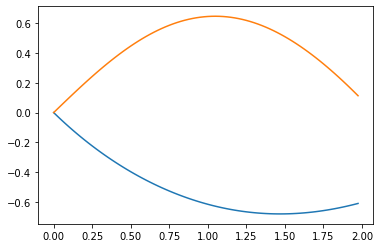

In [95]:
plt.plot(result[0], result[2])
plt.plot(result[0], result[0].apply(dsol))

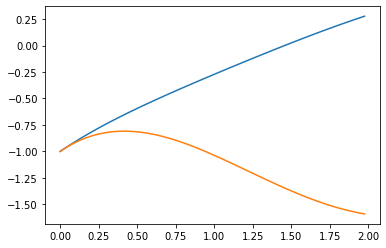

In [96]:
plt.plot(result[0], result[3])
plt.plot(result[0], result[0].apply(d2sol))